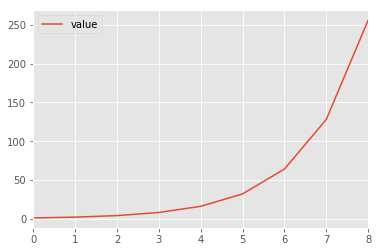

In [109]:
%matplotlib inline
#coding: utf-8

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import io
import os
import sys
import codecs

plt.style.use('ggplot')
# 2のべき乗数をPlot
df = pd.DataFrame([1,2,4,8,16,32,64,128,256],columns=['value'])
df.plot()

In [87]:
url = 'http://www.data.jma.go.jp/obd/stats/data/mdrr/tem_rct/alltable/mxtemsadext00_rct.csv'
# 気象庁から，日本全国の今日の最高気温を取得．
# read_csvでいろいろ凝ったことをしたいなら，engine='python'を指定したほうが無難かもしれない．
weather_df = pd.read_csv(url,engine='python',encoding='sjis')
weather_df

,観測所番号,都道府県,地点,国際地点番号,現在時刻(年),現在時刻(月),現在時刻(日),現在時刻(時),現在時刻(分),今日の最高気温(℃),...,昨日までの観測史上1位の値の品質情報,昨日までの観測史上1位の値を観測した起日（年）,昨日までの観測史上1位の値を観測した起日（月）,昨日までの観測史上1位の値を観測した起日（日）,昨日までの4月の1位の値,昨日までの4月の1位の値の品質情報,昨日までの4月の1位の値の起日（年）,昨日までの4月の1位の値の起日（月）,昨日までの4月の1位の値の起日（日）,統計開始年
0,11001,北海道宗谷地方,宗谷岬,NaN,2017,4,11,21,0,14.2,...,8,2000,8,1,21.8,8,2002,4,24,1978
1,11016,北海道宗谷地方,稚内,47401.0,2017,4,11,21,0,11.3,...,8,1946,8,22,20.2,8,1999,4,25,1938
2,11046,北海道宗谷地方,礼文,NaN,2017,4,11,21,0,9.7,...,8,2013,8,6,17.4,8,2012,4,26,2003
3,11061,北海道宗谷地方,声問,NaN,2017,4,11,21,0,12.6,...,8,2005,8,12,22.0,8,2012,4,26,2003
4,11076,北海道宗谷地方,浜鬼志別,NaN,2017,4,11,21,0,14.5,...,8,2000,7,31,22.4,8,2015,4,30,1978
5,11091,北海道宗谷地方,本泊,NaN,2017,4,11,21,0,11.2,...,8,2012,8,29,20.7,8,2012,4,26,2003
6,11121,北海道宗谷地方,沼川,NaN,2017,4,11,21,0,12.8,...,8,1989,7,26,24.7,8,2008,4,21,1977
7,11151,北海道宗谷地方,沓形,NaN,2017,4,11,21,0,10.3,...,8,1989,8,7,19.3,8,2012,4,26,1977
8,11176,北海道宗谷地方,豊富,NaN,2017,4,11,21,0,13.0,...,8,2000,8,1,22.7,8,1999,4,26,1977
9,11206,北海道宗谷地方,浜頓別,NaN,2017,4,11,21,0,14.4,...,4,1989,7,27,23.6,8,2015,4,30,1977


In [108]:
url = 'http://www.data.jma.go.jp/obd/stats/data/mdrr/tem_rct/alltable/mxtemsadext00_rct.csv'
# 気象庁から取得した，日本全国の今日の最高気温データから，長野県のものを抽出
# 日本全国の今日の最高気温を取得．indexに，都道府県を指定．
weather_df = pd.read_csv(url,engine='python',encoding='sjis',index_col=1,header=0)
# 都道府県が，長野県のデータをピックアップ
weather_df[weather_df.index.isin(['長野県'])]

,観測所番号,地点,国際地点番号,現在時刻(年),現在時刻(月),現在時刻(日),現在時刻(時),現在時刻(分),今日の最高気温(℃),今日の最高気温の品質情報,...,昨日までの観測史上1位の値の品質情報,昨日までの観測史上1位の値を観測した起日（年）,昨日までの観測史上1位の値を観測した起日（月）,昨日までの観測史上1位の値を観測した起日（日）,昨日までの4月の1位の値,昨日までの4月の1位の値の品質情報,昨日までの4月の1位の値の起日（年）,昨日までの4月の1位の値の起日（月）,昨日までの4月の1位の値の起日（日）,統計開始年
都道府県,,,,,,,,,,,,,,,,,,,,,
長野県,48031,野沢温泉,NaN,2017,4,11,21,0,7.0,5,...,8,1994,8,13,28.7,8,2005,4,28,1978
長野県,48061,信濃町,NaN,2017,4,11,21,0,8.9,5,...,8,2006,8,19,27.4,8,2005,4,28,1978
長野県,48066,飯山,NaN,2017,4,11,21,0,9.7,5,...,8,1994,8,14,32.2,8,2005,4,28,1978
長野県,48141,白馬,NaN,2017,4,11,21,0,5.9,5,...,8,1994,8,16,28.5,8,1998,4,20,1978
長野県,48156,長野,47610.0,2017,4,11,21,0,8.3,5,...,8,1994,8,16,30.8,8,1911,4,24,1889
長野県,48191,大町,NaN,2017,4,11,21,0,5.3,5,...,8,2002,8,1,27.6,8,2004,4,22,1978
長野県,48196,信州新町,NaN,2017,4,11,21,0,8.5,5,...,8,1994,8,16,30.1,8,2004,4,22,1978
長野県,48216,菅平,NaN,2017,4,11,21,0,3.4,5,...,8,1994,8,15,23.8,8,2004,4,22,1978
長野県,48256,上田,NaN,2017,4,11,21,0,6.8,5,...,8,2004,7,8,32.0,8,2004,4,22,1976


In [86]:
csv_url='https://www.mizuhobank.co.jp/rate/market/csv/quote.csv'
# 為替のデータを取得
rate_df = pd.read_csv(csv_url,encoding='sjis',engine='python')
rate_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,参考相場,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,NaN,米ドル,英ポンド,ユーロ,カナダドル,スイスフラン,スウェーデンクローネ,デンマーククローネ,ノルウェークローネ,オーストラリアドル,...,チェココロナ,ポーランドズロチ,ロシアルーブル,トルコリラ,NaN,インドネシアルピア,中国人民元,マレーシアリンギ,韓国ウォン,台湾ドル
1,NaN,USD,GBP,EUR,CAD,CHF,SEK,DKK,NOK,AUD,...,CZK,PLN,RUB,TRY,NaN,IDR(100),CNY,MYR,KRW(100),TWD
2,2002/4/1,133.15,189.79,116.12,83.48,79.28,12.87,15.63,15.08,71.14,...,*****,*****,NaN,NaN,NaN,1.37,16.09,*****,*****,3.82
3,2002/4/2,133.2,191.78,117.18,83.38,80.15,13,15.77,15.24,71.02,...,*****,*****,NaN,NaN,NaN,1.38,16.09,*****,*****,3.82
4,2002/4/3,133.2,191.26,116.96,83.65,80.02,12.95,15.75,15.23,71.14,...,*****,*****,NaN,NaN,NaN,1.37,16.09,*****,*****,3.82
5,2002/4/4,133.1,191.13,117.15,83.72,80.18,12.93,15.77,15.33,70.81,...,*****,*****,NaN,NaN,NaN,1.37,16.08,*****,*****,3.82
6,2002/4/5,132.3,189.74,116.32,82.96,79.47,12.87,15.65,15.22,70.33,...,*****,*****,NaN,NaN,NaN,1.37,15.98,*****,*****,3.8
7,2002/4/8,131.55,188.54,115.69,82.8,79,12.82,15.57,15.13,69.76,...,*****,*****,NaN,NaN,NaN,1.38,15.89,*****,*****,3.77
8,2002/4/9,131.55,188.31,115.05,82.45,78.46,12.69,15.48,15.08,69.5,...,*****,*****,NaN,NaN,NaN,1.39,15.89,*****,*****,3.78
9,2002/4/10,130.7,187.84,115.16,81.93,78.47,12.63,15.49,15.06,69.41,...,*****,*****,NaN,NaN,NaN,1.37,15.79,*****,*****,3.75


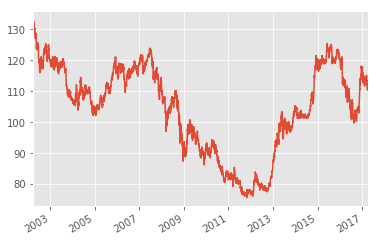

In [39]:
csv_url='https://www.mizuhobank.co.jp/rate/market/csv/quote.csv'
# 為替のデータを取得
rate_df = pd.read_csv(csv_url,skiprows=2,index_col=0,parse_dates=True)
# USDの為替の変動をPlot
df_pri = rate_df['USD']
df_pri.plot()